# Chapter 2: Optimization: Principles and Algorithms - Exercise 2.2. Q4 e Q5

Consider $f:\mathbb{R}^2 \to \mathbb{R}$ defined as \\[f(x)= x_1^2 + 2x_1x_2+2x_2^2.\\]

It corresponds to the fourth and fifth functions in Exercise 2.2 in the book.

First step is find the gradient of function  \\[f(x)= x_1^2 + 2x_1x_2+2x_2^2.\\]


In [14]:
import numpy as np
from sympy import symbols, diff, sympify, lambdify, latex
from IPython.display import display, Math
import matplotlib.pyplot as plt
from math import exp

def find_gradient(expressao_str, var_names=None):
    try:
        expr = sympify(expressao_str)
        if var_names is None:
            var_names = sorted([str(s) for s in expr.free_symbols], key=str)
        vars = symbols(var_names)
        
        derivadas = [diff(expr, var) for var in vars]
        grad_func = lambdify(vars, derivadas, 'numpy')
        
        class Gradiente:
            def __init__(self, vars, derivadas, grad_func):
                self.vars = vars
                self.derivadas = derivadas
                self.grad_func = grad_func
            
            def __call__(self, x=None):
                """Calcula o gradiente num ponto ou retorna a forma simbólica"""
                if x is not None:
                    return np.array(self.grad_func(*x), dtype=np.float64)
                return self
            
            def simbolico(self):
                """Retorna a representação simbólica como string"""
                parts = []
                for var, df in zip(self.vars, self.derivadas):
                    parts.append(f"∂f/∂{var} = {df}")
                return "Gradiente:\n" + "\n".join(parts)
            
            def latex(self, x=None, eval_decimals=4):
                """Mostra representação LaTeX (auto-renderiza no Jupyter)"""
                latex_vars = ','.join([f"{var}" for var in self.vars])
                latex_derivs = [latex(d) for d in self.derivadas]
                
                # Constrói a matriz das derivadas
                rows = " \\\\ ".join([f"\\frac{{\\partial f}}{{\\partial {var}}}" 
                                     for var in self.vars])
                values = " \\\\ ".join(latex_derivs)
                
                ltx = (f"\\nabla f({latex_vars}) = \\begin{{bmatrix}}{rows}\\end{{bmatrix}} = "
                       f"\\begin{{bmatrix}}{values}\\end{{bmatrix}}")
                
                if x is not None:
                    valores = self.grad_func(*x)
                    num_vals = " \\\\ ".join([f"{v:.{eval_decimals}f}" for v in valores])
                    ltx += (f"\\quad \\text{{em }} {x} = "
                            f"\\begin{{bmatrix}}{num_vals}\\end{{bmatrix}}")
            
                
                display(Math(ltx))
                return self
            
            def __repr__(self):
                return self.simbolico()
        
        return Gradiente(vars, derivadas, grad_func)
    
    except Exception as e:
        print(f"Erro ao criar gradiente: {str(e)}")
        return None

def find_hessian(expressao_str, var_names=['x1', 'x2']):

    try:
        vars = symbols(var_names)
        expr = sympify(expressao_str)
        
        hessiana = [[diff(diff(expr, var1), var2) for var2 in vars] for var1 in vars]
        hess_func = lambdify(vars, hessiana, 'numpy')
        
        def mostrar_hessiana(x=None):
            if x is not None:
                return np.array(hess_func(*x), dtype=np.float64)
            else:
                h11, h12 = hessiana[0][0], hessiana[0][1]
                h21, h22 = hessiana[1][0], hessiana[1][1]
                
                output = (
                    f"H = [ {h11}  {h12} ]\n"
                    f"    [ {h21}  {h22} ]"
                )
                print(output)
                return output
        
        return mostrar_hessiana
    
    except Exception as e:
        print(f"Erro ao criar Hessiana: {str(e)}")
        return None
        
def calcular_funcao(expressao, ponto):
    x1, x2 = ponto
    return eval(expressao, {'x1': x1, 'x2': x2, 'exp': exp})

def plot_func3d(f, x_range=(-5, 5), y_range=(-5, 5), step=0.25, cmap='viridis', title='Gráfico 3D da função'):
    x = np.arange(*x_range, step)
    y = np.arange(*y_range, step)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cmap)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$f(x, y)$')
    ax.set_title(title)
    plt.show()

In [15]:
f1 = find_gradient("x1**2 + 2*x1*x2 + 2*x2**2")
f1().latex()

<IPython.core.display.Math object>

Gradiente:
∂f/∂x1 = 2*x1 + 2*x2
∂f/∂x2 = 2*x1 + 4*x2

In [16]:
Second step is find hessian

<class 'SyntaxError'>: invalid syntax (<ipython-input-16-11649796aa45>, line 1)

In [17]:
h = find_hessian("x1**2 + 2*x1*x2 + 2*x2**2")
h()

H = [ 2  2 ]
    [ 2  4 ]


'H = [ 2  2 ]\n    [ 2  4 ]'

Third step Evaluate the function at \\[ x = \left(\begin{array}{c}1 \\ 1 \end{array}\right).\\]

In [18]:
g = find_gradient("x1**2 + 2*x1*x2 + 2*x2**2")
g().latex([1.0, 1.0]) 

h = find_hessian("x1**2 + 2*x1*x2 + 2*x2**2")
h()


<IPython.core.display.Math object>

H = [ 2  2 ]
    [ 2  4 ]


'H = [ 2  2 ]\n    [ 2  4 ]'

In [19]:
expressao = "x1**2 + 2*x1*x2 + 2*x2**2"
ponto = [1, 1]

resultado = calcular_funcao(expressao, ponto)
print(f"f({ponto}) = {resultado}")

f([1, 1]) = 5


Then we plot the function

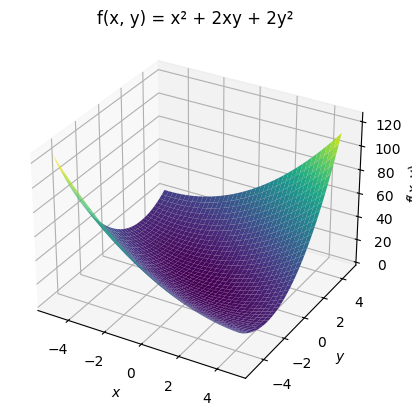

In [146]:
def plotG(x, y):
    return x**2 + 2*x*y + 2*y**2

plot_func3d(plotG, x_range=(-5, 5), y_range=(-5, 5), step=0.25, title='f(x, y) = x² + 2xy + 2y²')


Consider the direction \\[ d = \left(\begin{array}{c} -4 \\ -6 \end{array} \right), \\]
and \\[ g(\alpha) = f(x+ \alpha d),\\] the one-dimensional function from $x$ along $d$.

Plot that function.

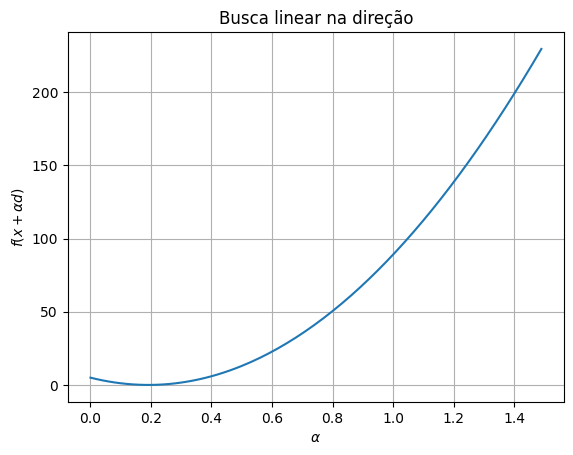

⟨g, d⟩ = -52
Curvatura na direção d: 5.230769230769231

        ANÁLISE DA FUNÇÃO NO PONTO [0, 0]         

● Gradiente:
∇f(x) = [4.000000, 6.000000]

● Matriz Hessiana:
H(x) = [ [2.000000  2.000000]
         [2.000000  4.000000] ]

● Produto Interno ⟨g, d⟩:
⟨g, d⟩ = -52.000000

● Curvatura na direção d:
κ(d) = 5.230769

● Análise Espectral:
Autovalores: λ₁ = 0.763932, λ₂ = 5.236068

Autovetores (colunas):
v₁ = [-0.850651, 0.525731]
v₂ = [-0.525731, -0.850651]

● Curvaturas Principais:
κ(v₁) = 0.763932
κ(v₂) = 5.236068



In [36]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    x1, x2 = x
    return x1**2 + 2*x1*x2 + 2*x2**2

x = np.array([1, 1])

def grad_f(x):
    x1, x2 = x
    return np.array([2*x1 + 2*x2, 2*x1 + 4*x2])

d = -grad_f(x)

def onedimension(alpha):
    thex = x + alpha * d
    return f(thex)

plotalpha = np.arange(0, 1.5, 0.01)  
fx = np.array([onedimension(alpha) for alpha in plotalpha])

# Plota o gráfico
plt.plot(plotalpha, fx)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$f(x + \alpha d)$')
plt.title('Busca linear na direção')
plt.grid(True)
plt.show()

def grad_f(x):
    x1, x2 = x
    return np.array([2*x1 + 2*x2, 2*x1 + 4*x2])

def hess_f():
    return np.array([
        [2, 2],
        [2, 4]
    ])

x = np.array([1, 1])
g = grad_f(x)
h = hess_f()
d = -g

print("⟨g, d⟩ =", np.inner(g, d))

def curvature(h, d):
    return np.inner(d, h @ d) / np.inner(d, d)

print("Curvatura na direção d:", curvature(h, d))

from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(h)

print("\n" + "="*50)
print("ANÁLISE DA FUNÇÃO NO PONTO [1, 1]".center(50))
print("="*50)

print("\n● Gradiente:")
print(f"∇f(x) = [{g[0]:.6f}, {g[1]:.6f}]")

print("\n● Matriz Hessiana:")
print(f"H(x) = [ [{h[0,0]:.6f}  {h[0,1]:.6f}]")
print(f"         [{h[1,0]:.6f}  {h[1,1]:.6f}] ]")

print("\n● Produto Interno ⟨g, d⟩:")
print(f"⟨g, d⟩ = {np.inner(g, d):.6f}")

print("\n● Curvatura na direção d:")
print(f"κ(d) = {curvature(h, d):.6f}")

print("\n● Análise Espectral:")
print(f"Autovalores: λ₁ = {eigenvalues[0]:.6f}, λ₂ = {eigenvalues[1]:.6f}")
print("\nAutovetores (colunas):")
print(f"v₁ = [{eigenvectors[0,0]:.6f}, {eigenvectors[1,0]:.6f}]")
print(f"v₂ = [{eigenvectors[0,1]:.6f}, {eigenvectors[1,1]:.6f}]")

print("\n● Curvaturas Principais:")
print(f"κ(v₁) = {curvature(h, eigenvectors[:,0]):.6f}")
print(f"κ(v₂) = {curvature(h, eigenvectors[:,1]):.6f}")
print("="*50 + "\n")



Consider $f:\mathbb{R}^2 \to \mathbb{R}$ defined as \\[f(x)= x_1^2 - x_1x_2 + 2x_2^2 - 2x_1 + e^{x_1 + x_2}.\\]

In [23]:
f1 = find_gradient("x1**2 - x1*x2 + 2*x2**2 - 2*x1 + exp(x1 + x2)")
f1().latex()

h = find_hessian("x1**2 - x1*x2 + 2*x2**2 - 2*x1 + exp(x1 + x2)")
h()



<IPython.core.display.Math object>

H = [ exp(x1 + x2) + 2  exp(x1 + x2) - 1 ]
    [ exp(x1 + x2) - 1  exp(x1 + x2) + 4 ]


'H = [ exp(x1 + x2) + 2  exp(x1 + x2) - 1 ]\n    [ exp(x1 + x2) - 1  exp(x1 + x2) + 4 ]'

In [25]:
g = find_gradient("x1**2 - x1*x2 + 2*x2**2 - 2*x1 + exp(x1 + x2)")
g().latex([0, 0]) 

h = find_hessian("x1**2 - x1*x2 + 2*x2**2 - 2*x1 + exp(x1 + x2)")
h([0,0])

expressao = "x1**2 - x1*x2 + 2*x2**2 - 2*x1 + exp(x1 + x2)"
ponto = [0, 0]

resultado = calcular_funcao(expressao, ponto)
print(f"f({ponto}) = {resultado}")

<IPython.core.display.Math object>

f([0, 0]) = 1.0


In [26]:
expressao = "x1**2 - x1*x2 + 2*x2**2 - 2*x1 + exp(x1 + x2)"
ponto = [0, 0]

resultado = calcular_funcao(expressao, ponto)
print(f"f({ponto}) = {resultado}")

f([0, 0]) = 1.0


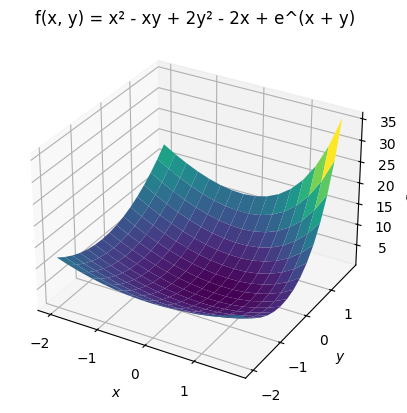

In [29]:
def plotG(x, y):
    return x**2 - x*y + 2*y**2 - 2*x + np.exp(x + y)

plot_func3d(plotG, x_range=(-2, 2), y_range=(-2, 2), step=0.25, title='f(x, y) = x² - xy + 2y² - 2x + e^(x + y)')

Consider the direction \\[ d = \left(\begin{array}{c} 1 \\ -1 \end{array} \right), \\]
and \\[ g(\alpha) = f(x+ \alpha d),\\] the one-dimensional function from $x$ along $d$.

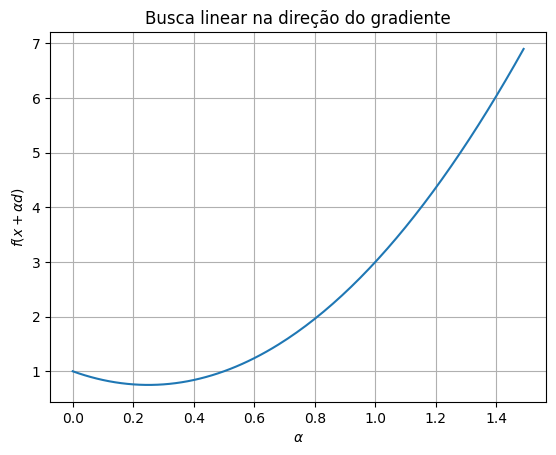

Gradiente no ponto [0,0]: [-1.  1.]

Hessiana no ponto [0,0]:
 [[3. 0.]
 [0. 5.]]

 -2.0⟩ =

 4.0atura na direção d:

        ANÁLISE DA FUNÇÃO NO PONTO [0, 0]         

● Gradiente:
∇f(x) = [-1.000000, 1.000000]

● Matriz Hessiana:
H(x) = [ [3.000000  0.000000]
         [0.000000  5.000000] ]

● Produto Interno ⟨g, d⟩:
⟨g, d⟩ = -2.000000

● Curvatura na direção d:
κ(d) = 4.000000

● Análise Espectral:
Autovalores: λ₁ = 3.000000, λ₂ = 5.000000

Autovetores (colunas):
v₁ = [1.000000, 0.000000]
v₂ = [0.000000, 1.000000]

● Curvaturas Principais:
κ(v₁) = 3.000000
κ(v₂) = 5.000000



In [35]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

# Nova função
def f(x):
    x1, x2 = x
    return x1**2 - x1*x2 + 2*x2**2 - 2*x1 + exp(x1 + x2)

# Ponto inicial
x = np.array([0, 0])

# Gradiente da nova função
def grad_f(x):
    x1, x2 = x
    return np.array([2*x1 - x2 - 2 + exp(x1 + x2), 
                    -x1 + 4*x2 + exp(x1 + x2)])

# Direção de descida
d = -grad_f(x)

# Função para busca unidimensional
def onedimension(alpha):
    thex = x + alpha * d
    return f(thex)

# Gera valores para plotagem
plotalpha = np.arange(0, 1.5, 0.01)  
fx = np.array([onedimension(alpha) for alpha in plotalpha])

# Plota o gráfico
plt.plot(plotalpha, fx)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$f(x + \alpha d)$')
plt.title('Busca linear na direção do gradiente')
plt.grid(True)
plt.show()

# Hessiana da nova função
def hess_f(x):
    x1, x2 = x
    exp_term = exp(x1 + x2)
    return np.array([
        [2 + exp_term, -1 + exp_term],
        [-1 + exp_term, 4 + exp_term]
    ])

# Análise no ponto x = [0, 0]
g = grad_f(x)
h = hess_f(x)
d = -g

print("Gradiente no ponto [0,0]:", g)
print("\nHessiana no ponto [0,0]:\n", h)
print("\n⟨g, d⟩ =", np.inner(g, d))

# Função curvatura
def curvature(h, d):
    return np.inner(d, h @ d) / np.inner(d, d)

print("\nCurvatura na direção d:", curvature(h, d))

# Análise de autovalores
from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(h)

print("\n" + "="*50)
print("ANÁLISE DA FUNÇÃO NO PONTO [0, 0]".center(50))
print("="*50)

print("\n● Gradiente:")
print(f"∇f(x) = [{g[0]:.6f}, {g[1]:.6f}]")

print("\n● Matriz Hessiana:")
print(f"H(x) = [ [{h[0,0]:.6f}  {h[0,1]:.6f}]")
print(f"         [{h[1,0]:.6f}  {h[1,1]:.6f}] ]")

print("\n● Produto Interno ⟨g, d⟩:")
print(f"⟨g, d⟩ = {np.inner(g, d):.6f}")

print("\n● Curvatura na direção d:")
print(f"κ(d) = {curvature(h, d):.6f}")

print("\n● Análise Espectral:")
print(f"Autovalores: λ₁ = {eigenvalues[0]:.6f}, λ₂ = {eigenvalues[1]:.6f}")
print("\nAutovetores (colunas):")
print(f"v₁ = [{eigenvectors[0,0]:.6f}, {eigenvectors[1,0]:.6f}]")
print(f"v₂ = [{eigenvectors[0,1]:.6f}, {eigenvectors[1,1]:.6f}]")

print("\n● Curvaturas Principais:")
print(f"κ(v₁) = {curvature(h, eigenvectors[:,0]):.6f}")
print(f"κ(v₂) = {curvature(h, eigenvectors[:,1]):.6f}")
print("="*50 + "\n")